# Glassdoor Search Result Analysis
# Job title: Data Scientist
# Location: Ontario

## Dataset:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.width', 200)

df = pd.read_csv('scrapped jobs - 06-21-2021 18h33m31s.csv')

df

,Company,Job Title,Location,Employer Estimated Salary,Easy Apply,Special Label,Job Age,Overall Rating,Compensation & Benefit,Culture & Value,Career Opportunitie,Work/Life Balanc,Job Type,Job Function,Industry,Size,Founded,Type,Sector,Revenue,Recommend to a friend,Approve of CEO,Total Ratings,Job Description,Scraping Start Time: 06-21-2021 18h33m31s,"Starting Link: https://www.glassdoor.ca/Job/ontario-data-scientist-jobs-SRCH_IL.0,7_IS4080_KO8,22.htm"
0,AIR MILES,Data Scientist Lead,Midtown Toronto,NaN,False,Actively Hiring,3d,3.2,3.1,3.0,2.8,3.3,Full-time,Data Scientist,Advertising & Marketing,501 to 1000 Employees,1992.0,Company - Private,Business Service,$1 to $2 billion (USD),44%,44%,5 Ratings,It's fun to work in a company where people tru...,NaN,NaN
1,Pink Triangle Press,Research & Analytical Director - Data Scientist,Midtown Toronto,CA$84k - CA$106k (Glassdoor Est.),True,Hiring Surge,4d,3.5,3.4,3.7,2.3,3.9,Full-time,Data Scientist,Publishing,51 to 200 Employees,NaN,Company - Private,Media,$1 to $5 million (USD),55%,100%,1 Ratings,Pink Triangle Press (PTP) is looking for a Res...,NaN,NaN
2,Leonardo Canada - Electronics (TTI - Tactical ...,Radar E/W Scientists,Ottawa,NaN,True,NaN,6d,NaN,NaN,NaN,NaN,NaN,Full-time,Research Scientist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"RadarE/W Scientists, Ottawa Canada\r\nRemote w...",NaN,NaN
3,Sun Life Financial,Data Analyst,Waterloo,CA$56k - CA$95k (Glassdoor Est.),False,Top Company,3d,4.0,3.8,4.1,3.8,3.9,Full-time,Data Analyst,Insurance Operator,10000+ Employees,1865.0,Company - Public,Insurance,$10+ billion (USD),84%,96%,370 Ratings,"You are as unique as your background, experien...",NaN,NaN
4,Russell Hendrix Foodservice Equipment,Data Analyst,Midtown Toronto,NaN,True,HOT,16d,3.0,2.9,2.9,2.8,2.9,Full-time,Data Analyst,NaN,501 to 1000 Employees,NaN,Company - Public,NaN,Unknown / Non-Applicable,51%,80%,5 Ratings,"With over 70 years of experience, Russell Hend...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,CyberCoders,Sr. Machine Learning Engineer - Facial Recogni...,Midtown Toronto,NaN,True,New,24h,4.1,3.7,4.0,4.1,3.8,Full-time,Machine Learning Engineer,Staffing & Outsourcing,201 to 500 Employees,1999.0,Subsidiary or Business Segment,Business Service,$100 to $500 million (USD),72%,87%,42 Ratings,Sr. Machine Learning Engineer - Facial Recogni...,NaN,NaN
896,Lixar I.T,Senior Data Engineer,Midtown Toronto,CA$120k - CA$140k (Glassdoor Est.),True,NaN,22d,NaN,NaN,NaN,NaN,NaN,Full-time,Data Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lixar fuelled by BDO is looking for a Senior D...,NaN,NaN
897,Spin Master Ltd,Sr. Data Engineer,Midtown Toronto,CA$95k - CA$120k (Glassdoor Est.),False,NaN,6d,3.1,3.1,3.1,2.9,2.6,Full-time,Data Engineer,Consumer Products Manufacturing,1001 to 5000 Employees,1994.0,Company - Public,Manufacturing,$2 to $5 billion (USD),51%,64%,142 Ratings,Are you a kid at heart looking to build a care...,NaN,NaN
898,Gore Mutual Insurance Company,Lead Data Engineer,Cambridge,NaN,True,NaN,19d,3.0,3.3,3.6,2.9,3.5,Full-time,Data Engineer,Insurance Operator,201 to 500 Employees,1839.0,Company - Private,Insurance,$100 to $500 million (USD),62%,68%,9 Ratings,The Data Engineering practice at Gore Mutual I...,NaN,NaN


## Data Cleaning:

In [2]:
# Drop last two columns
df.drop(columns=['Scraping Start Time: 06-21-2021 18h33m31s', 'Starting Link: https://www.glassdoor.ca/Job/ontario-data-scientist-jobs-SRCH_IL.0,7_IS4080_KO8,22.htm'], inplace=True)

# Drop duplicates()
df.drop_duplicates(inplace=True)

## Ratings distribution:

Text(0, 0.5, 'Number of Postings')

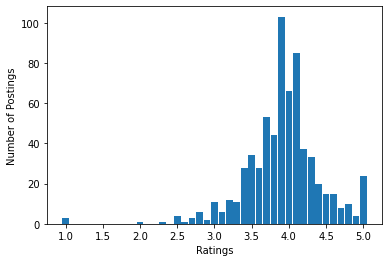

In [3]:
ratings_group = df.groupby('Overall Rating').count()['Company']
ratings = ratings_group.index
company_count = ratings_group
plt.bar(ratings, company_count, width=.09)
plt.xlabel('Ratings')
plt.ylabel('Number of Postings')

## What are the effects of Easy Apply?

In [4]:
# Add 'Job Age in Hours' column

def convert_to_hour(time):
    if time[-1] == 'd':
        return 24*float(time[:-1])
    return float(time[:-1])

# .apply is not the most efficient but we don't have a lot of data
df['Job Age in Hours'] = df['Job Age'].apply(convert_to_hour)


In [5]:
print(df.groupby('Easy Apply').count()['Company'])
df.groupby('Easy Apply').mean()

Easy Apply
False    452
True     267
Name: Company, dtype: int64


,Overall Rating,Compensation & Benefit,Culture & Value,Career Opportunitie,Work/Life Balanc,Founded,Job Age in Hours
Easy Apply,,,,,,,
False,3.937241,3.699307,3.879215,3.695381,3.707852,1955.800518,323.575221
True,3.878541,3.627632,3.860965,3.638596,3.854825,1991.653409,289.438202


## Summary:
### • ~37% of all job postings uses the Easy Apply feature
### • Newer companies use the feature more
### • When Easy Apply is enabled:
### `10% decreased time to fill the position on average`
### `2.5% lower ratings on average`

## What are the effects of Company Age:

In [6]:
# Only looking at unique companies
# Remove rows with duplicate company
company_df = df.drop_duplicates(['Company'], keep='first').drop(columns=['Job Title', 'Job Type','Job Description', 'Employer Estimated Salary', 'Special Label', 'Job Age', 'Easy Apply', 'Job Age in Hours'])

Text(0.5, 1.0, 'Company Age vs Overall Rating')

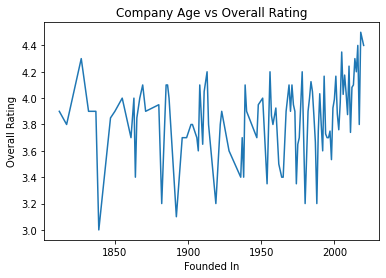

In [7]:
company_df = company_df[~company_df['Founded'].isna()]

founded_group = company_df.groupby('Founded').mean()
founded = founded_group.index

plt.plot(founded, founded_group['Overall Rating'])
plt.xlabel('Founded In')
plt.ylabel('Overall Rating')
plt.title('Company Age vs Overall Rating')


Text(0.5, 1.0, 'Company Age vs Career Opportunity')

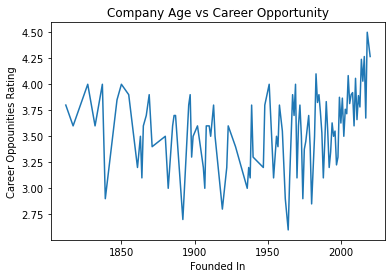

In [8]:
plt.plot(founded, founded_group['Career Opportunitie'])
plt.xlabel('Founded In')
plt.ylabel('Career Oppounities Rating')
plt.title('Company Age vs Career Opportunity')

## Summary:
### • Companies founded after year ~2000 have drastically higher overall ratings and career opportunities ratings

## What Job Functions are most in demand?

Text(0.5, 1.0, 'Job Function vs Career Opportunity')

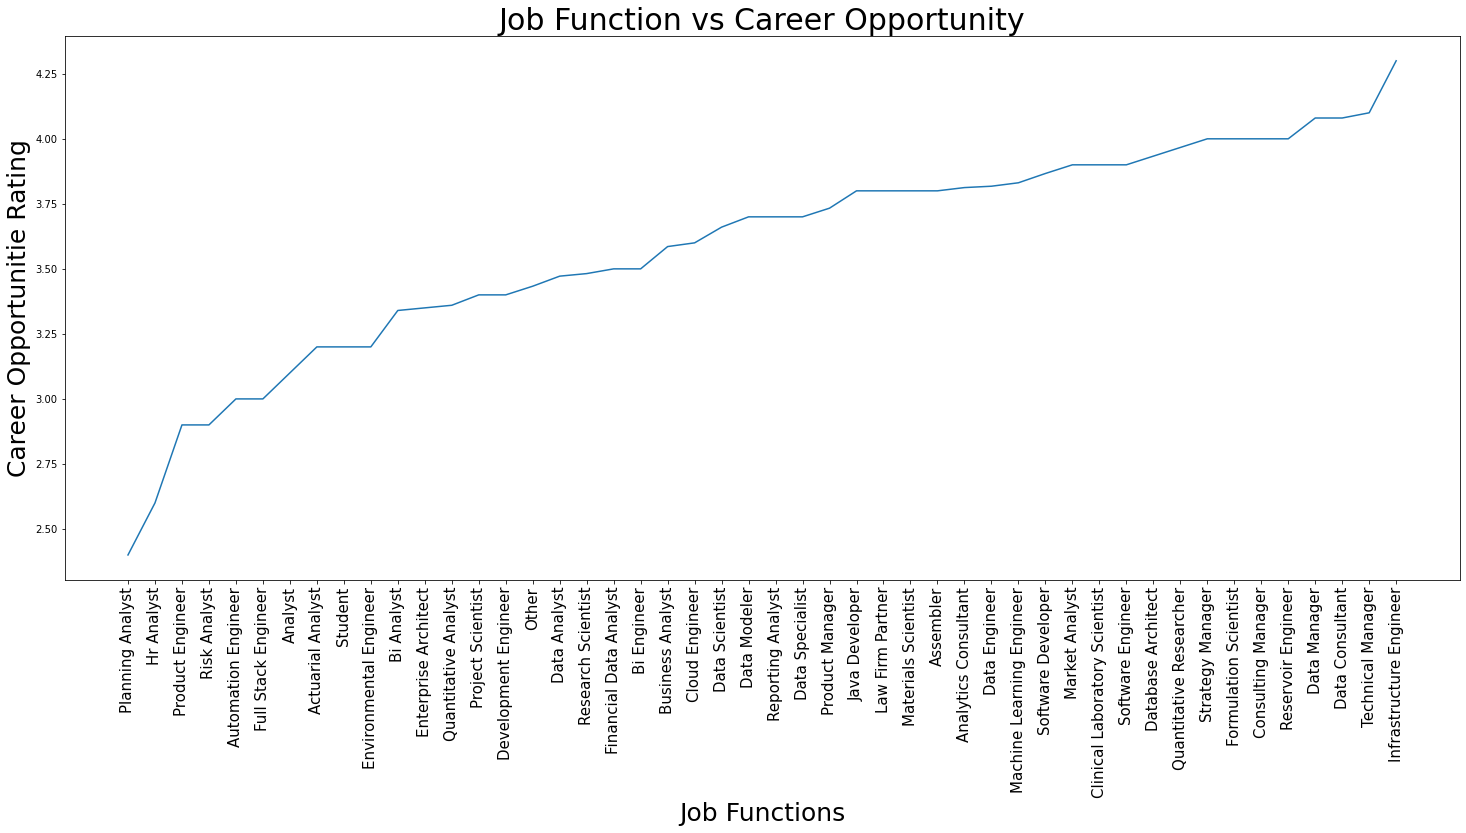

In [9]:
job_func_group = df.groupby('Job Function').mean().sort_values('Career Opportunitie')

# Drop rows where 'Career Opportunities is NaN'
job_func_group = job_func_group[~job_func_group['Career Opportunitie'].isna()]
job_func = job_func_group.index

plt.figure(figsize=(25,10))

plt.plot(job_func, job_func_group['Career Opportunitie'])
plt.xticks(job_func, rotation='vertical', size=15)
plt.xlabel('Job Functions', size=25)
plt.ylabel('Career Opportunitie Rating',size=25)
plt.title('Job Function vs Career Opportunity', size=30)



## Which locations have the best career opportunities?

Text(0.5, 1.0, 'Location vs Career Opportunity')

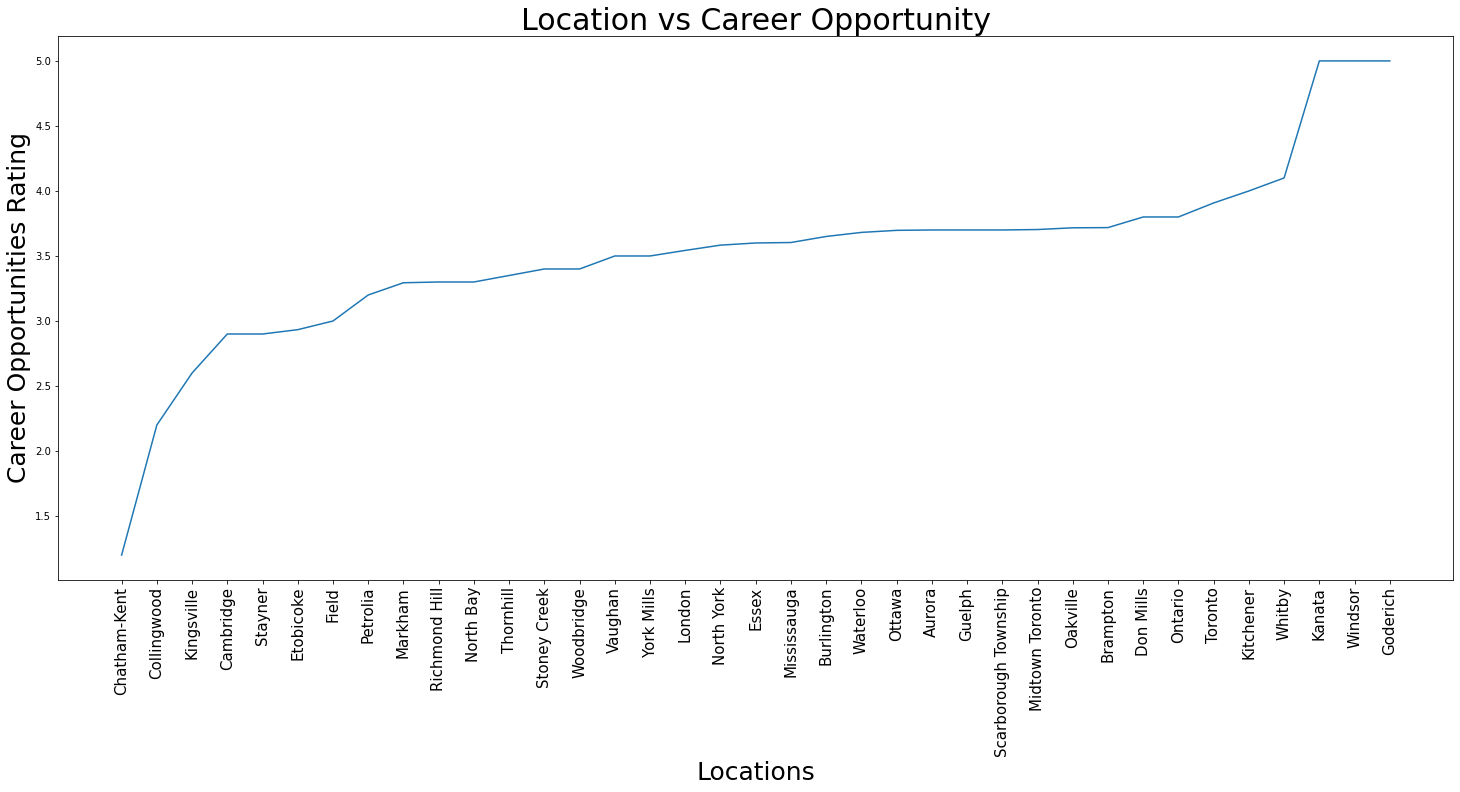

In [10]:
loc_group = df.groupby('Location').mean().sort_values('Career Opportunitie')
# Drop rows where 'Career Opportunities is NaN'
loc_group = loc_group[~loc_group['Career Opportunitie'].isna()]
locations = loc_group.index

plt.figure(figsize=(25,10))

plt.plot(locations, loc_group['Career Opportunitie'])
plt.xticks(locations, rotation='vertical', size=15)
plt.xlabel('Locations', size=25)
plt.ylabel('Career Opportunities Rating',size=25)
plt.title('Location vs Career Opportunity', size=30)



## Location by Salary:

In [11]:
def mean_salary(salary_range):
    if len(salary_range) == 2:
        return 1000 * (float(salary_range[0]) + float(salary_range[1]))/2
    return 1000 * float(salary_range[0])
    
# Remove rows with NaN Salary
salary_df = df[~df['Employer Estimated Salary'].isna()]
salary_df['Estimated Salary'] = salary_df['Employer Estimated Salary'].str.replace('$','').str.replace('CA','').str.replace('(Glassdoor Est.)','').str.replace('k','').str[:-3].str.split(' - ')
salary_df['Estimated Salary'] = salary_df['Estimated Salary'].apply(mean_salary)

salary_df.sort_values('Estimated Salary', inplace=True)
salary_df

<ipython-input-11-bd722eb05690>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  salary_df['Estimated Salary'] = salary_df['Employer Estimated Salary'].str.replace('$','').str.replace('CA','').str.replace('(Glassdoor Est.)','').str.replace('k','').str[:-3].str.split(' - ')
<ipython-input-11-bd722eb05690>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  salary_df['Estimated Salary'] = salary_df['Employer Estimated Salary'].str.replace('$','').str.replace('CA','').str.replace('(Glassdoor Est.)','').str.replace('k','').str[:-3].str.split(' - ')
<ipython-input-11-bd722eb05690>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,Company,Job Title,Location,Employer Estimated Salary,Easy Apply,Special Label,Job Age,Overall Rating,Compensation & Benefit,Culture & Value,Career Opportunitie,Work/Life Balanc,Job Type,Job Function,Industry,Size,Founded,Type,Sector,Revenue,Recommend to a friend,Approve of CEO,Total Ratings,Job Description,Job Age in Hours,Estimated Salary
193,Loblaw Companies Limited,"Data Science Analyst, Business Intelligence",Brampton,CA$29k - CA$38k (Glassdoor Est.),False,Hiring Surge,18d,3.6,3.1,3.5,3.2,3.5,Full-time,Data Analyst,Vehicle Dealers,10000+ Employees,NaN,Company - Public,Retail,$10+ billion (USD),67%,71%,868 Ratings,Les candidats référés ne doivent pas postuler ...,432.0,33500.0
590,SYNNEX Corporation,Business Systems Analyst – Data Analyst,Midtown Toronto,CA$42k - CA$46k (Glassdoor Est.),False,NaN,9d,3.9,3.4,3.8,3.4,3.6,Full-time,Business Analyst,Enterprise Software & Network Solutions,10000+ Employees,1980.0,Company - Public,Information Technology,$10+ billion (USD),79%,96%,72 Ratings,What makes SYNNEX extraordinary? We believe th...,216.0,44000.0
486,Weston Foods,"Technical Data Analyst, Accounts Payable",Etobicoke,CA$37k - CA$51k (Glassdoor Est.),False,NaN,27d,3.2,3.3,3.2,3.0,3.1,Full-time,Data Analyst,Food & Drink Manufacturing,5001 to 10000 Employees,1882.0,Subsidiary or Business Segment,Manufacturing,$2 to $5 billion (USD),55%,76%,50 Ratings,"Job Address:\r\n1 Eva Rd, Suite 416, Etobicoke...",648.0,44000.0
463,Complete Wind Corporation,Data Analyst - Wind,Goderich,CA$36k - CA$55k (Glassdoor Est.),True,NaN,7d,4.5,5.0,5.0,5.0,5.0,Full-time,Data Analyst,NaN,1 to 50 Employees,NaN,Company - Public,NaN,Unknown / Non-Applicable,100%,NaN,0 Ratings,"Complete Wind, Acuren’s affiliate, is a leadin...",168.0,45500.0
220,University of Toronto,Python/Django Data Portal Developer,Midtown Toronto,CA$33k - CA$62k (Glassdoor Est.),True,HOT,21d,4.3,3.8,4.1,4.0,3.9,Full-time,Software Developer,Colleges & Universities,10000+ Employees,1827.0,College / University,Education,$2 to $5 billion (USD),90%,91%,563 Ratings,Position Title: Python/Django Data Portal Deve...,504.0,47500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,SADA,Senior Data Engineer,Midtown Toronto,CA$124k - CA$161k (Glassdoor Est.),True,NaN,18d,4.8,4.5,4.7,4.5,4.4,Full-time,Data Engineer,IT Service,201 to 500 Employees,2000.0,Company - Private,Information Technology,$100 to $500 million (USD),96%,99%,157 Ratings,Join SADA as a Sr. Data Engineer!\r\n\r\nYour ...,432.0,142500.0
135,Amazon Dev Centre Canada ULC,"Data Scientist, AWS Security",Ottawa,CA$136k - CA$153k (Glassdoor Est.),False,NaN,25d,3.8,3.9,3.6,3.8,3.2,Full-time,Data Scientist,Internet,10000+ Employees,1994.0,Company - Public,Information Technology,$10+ billion (USD),72%,80%,24044 Ratings,BS degree and 3 years of relevant experience o...,600.0,144500.0
473,Amazon Dev Centre Canada ULC,"Machine Learning Engineer, Ad Tech Search Expe...",Midtown Toronto,CA$138k - CA$169k (Glassdoor Est.),False,NaN,9d,3.8,3.9,3.6,3.8,3.2,Full-time,Machine Learning Engineer,Internet,10000+ Employees,1994.0,Company - Public,Information Technology,$10+ billion (USD),72%,80%,24044 Ratings,2+ years of non-internship professional softwa...,216.0,153500.0
663,Amazon Dev Centre Canada ULC,"Machine Learning Engineer, Ad Tech Search Expe...",Midtown Toronto,CA$138k - CA$169k (Glassdoor Est.),False,NaN,9d,3.8,3.9,3.6,3.8,3.2,Full-time,Machine Learning Engineer,Internet,10000+ Employees,1994.0,Company - Public,Information Technology,$10+ billion (USD),72%,80%,24044 Ratings,2+ years of non-internship professional softwa...,216.0,153500.0


Text(0.5, 1.0, 'Location vs Estimated Salary')

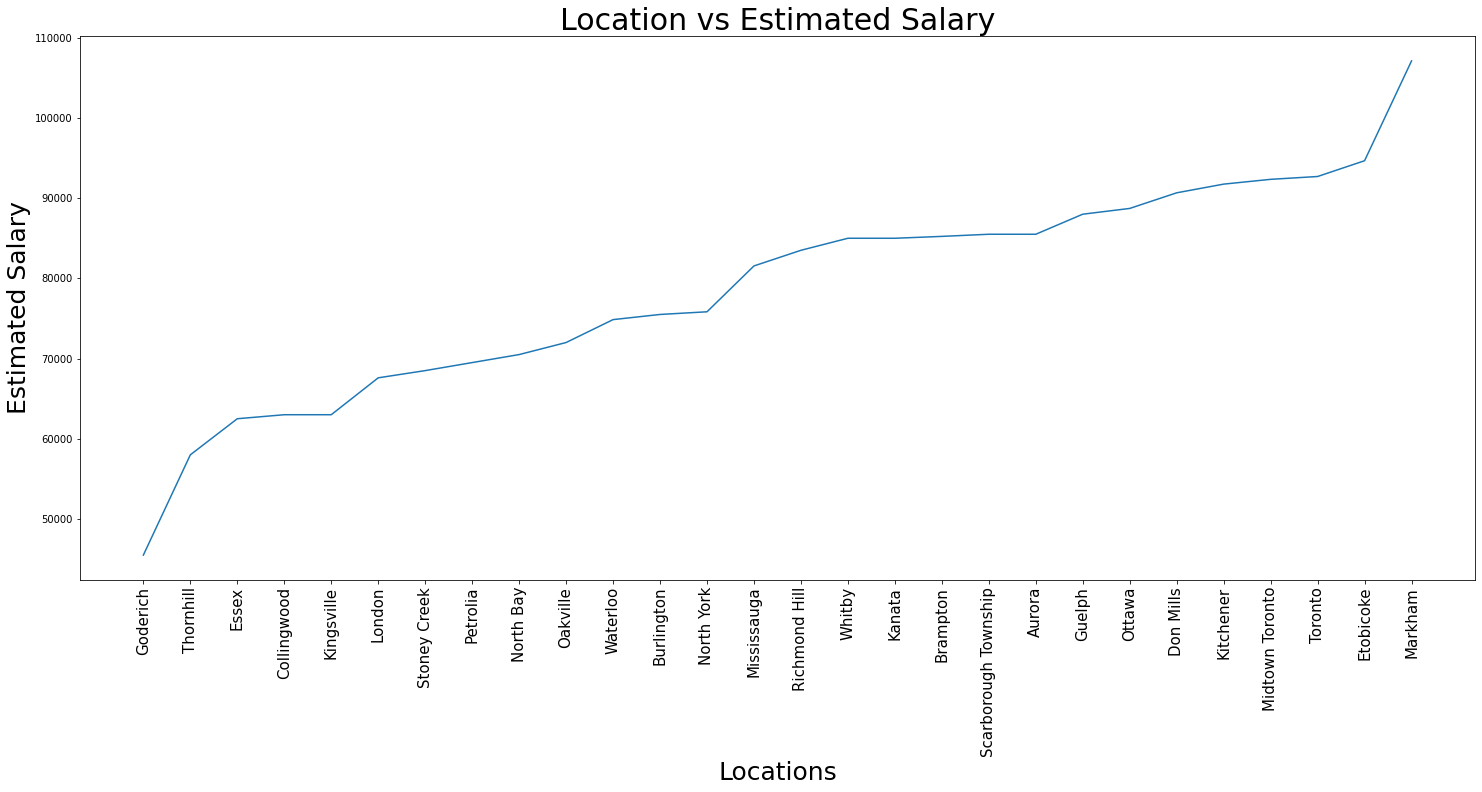

In [12]:
loc_group = salary_df.groupby('Location').mean().sort_values('Estimated Salary')
locations = loc_group.index

plt.figure(figsize=(25,10))

plt.plot(locations, loc_group['Estimated Salary'])
plt.xticks(locations, rotation='vertical', size=15)
plt.xlabel('Locations', size=25)
plt.ylabel('Estimated Salary',size=25)
plt.title('Location vs Estimated Salary', size=30)

Text(0.5, 1.0, 'Company vs Estimated Salary')

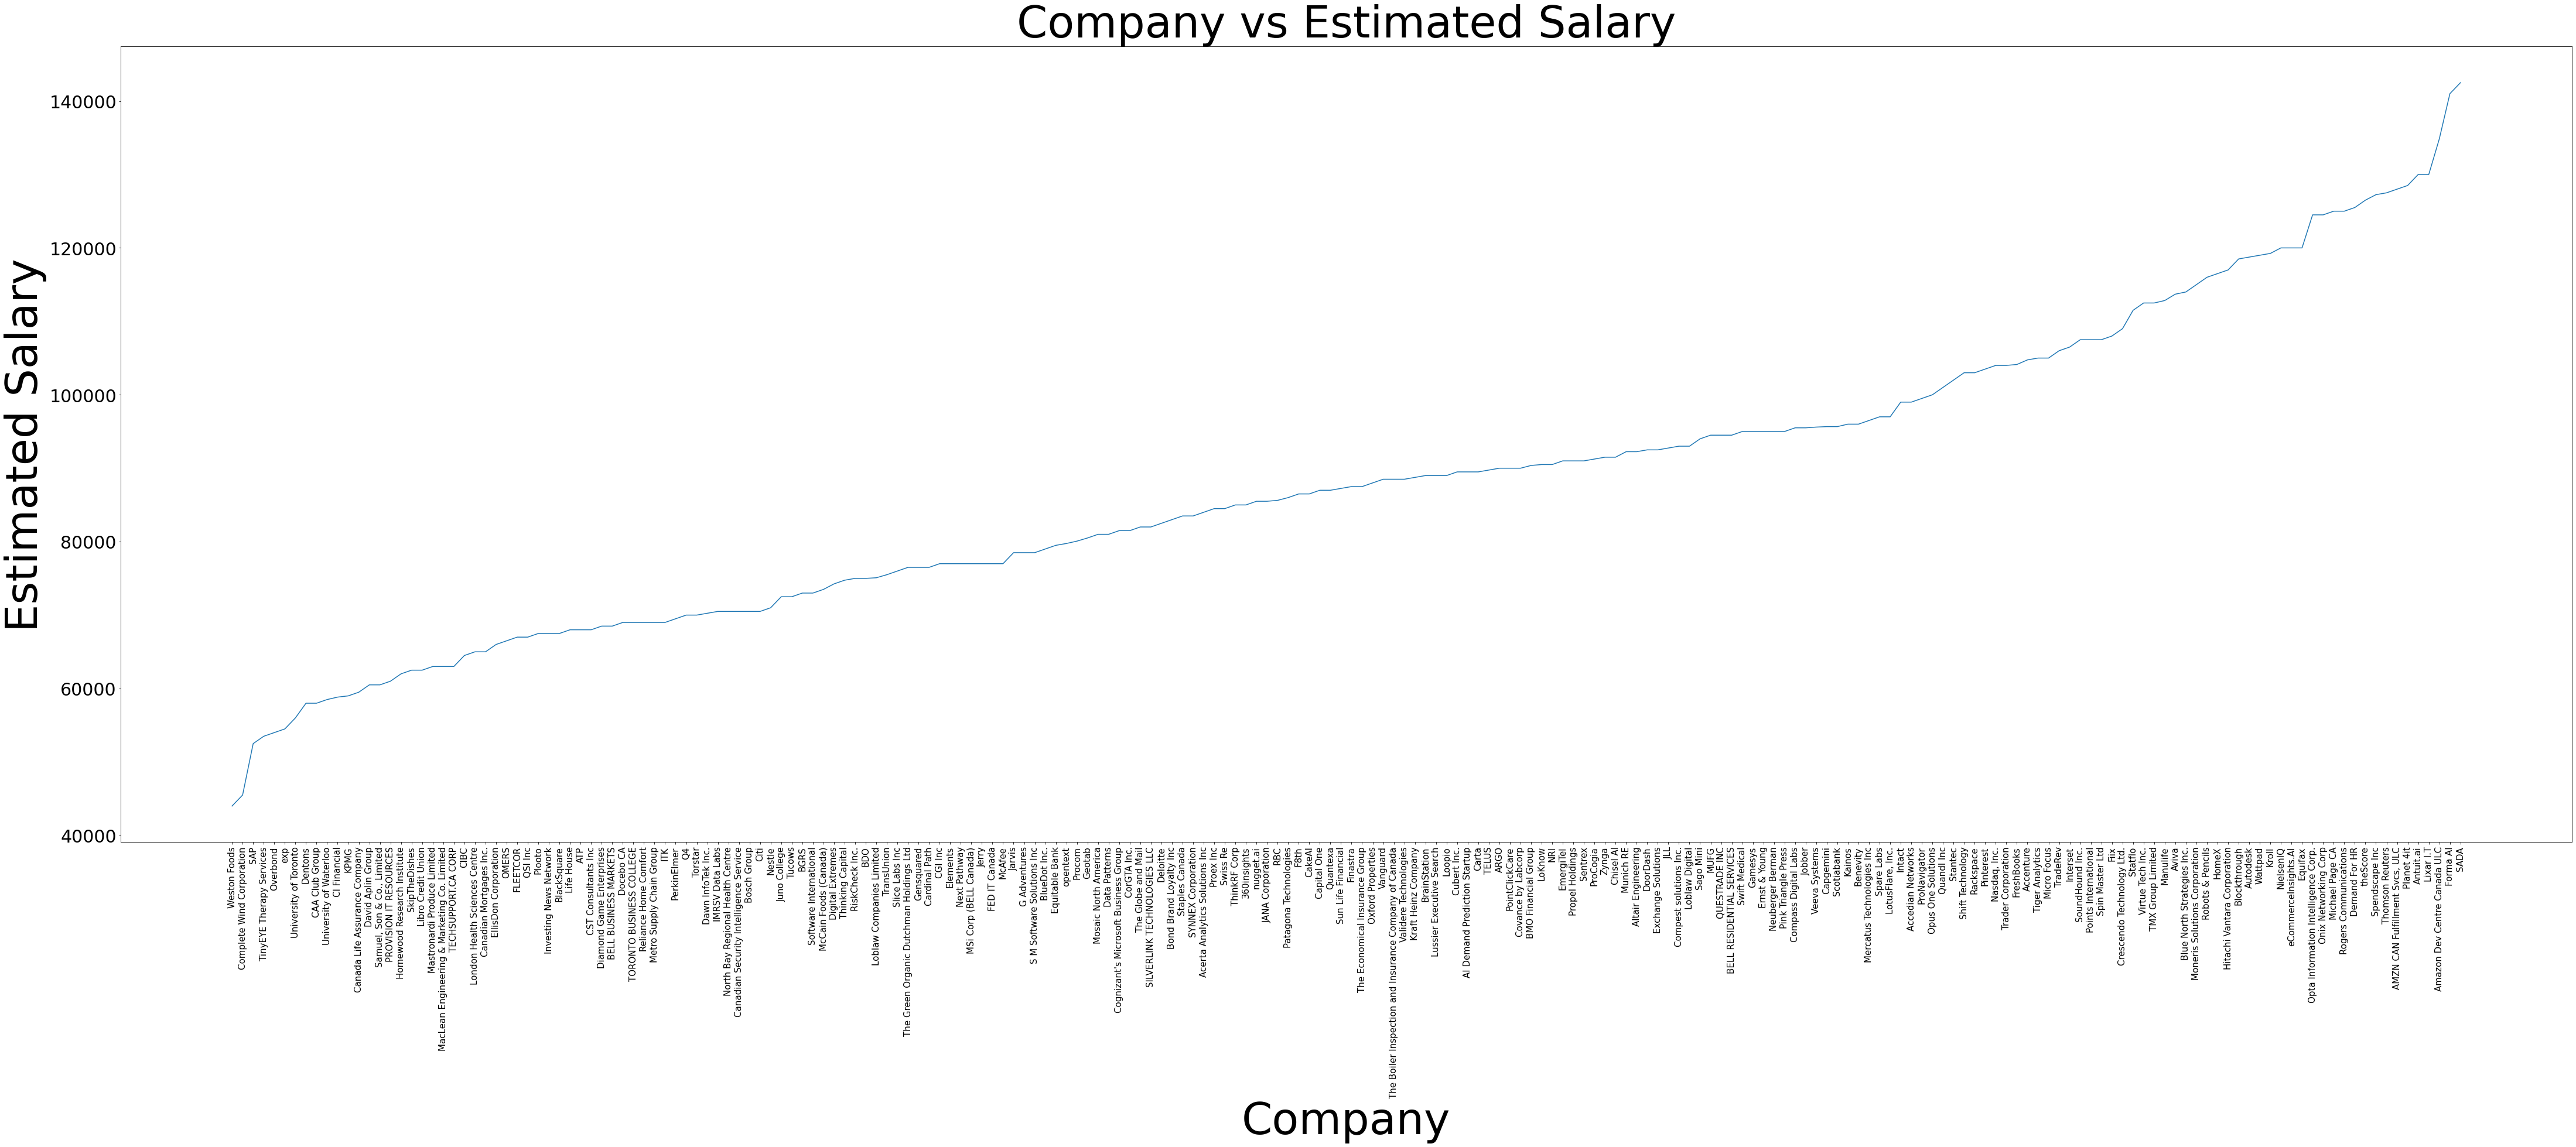

In [13]:
company_group = salary_df.groupby('Company').mean().sort_values('Estimated Salary')
locations = company_group.index

plt.figure(figsize=(75,25))

plt.plot(locations, company_group['Estimated Salary'])
plt.yticks(size=30)
plt.xticks(rotation='vertical', size=15)
plt.xlabel('Company', size=75)
plt.ylabel('Estimated Salary',size=75)
plt.title('Company vs Estimated Salary', size=75)

## Let's analyze the job description of the job with the highest salary:

In [14]:
# Find the highest salary job
highest_salary_job = salary_df[salary_df['Estimated Salary'] == max(salary_df['Estimated Salary'])]
highest_salary_job

,Company,Job Title,Location,Employer Estimated Salary,Easy Apply,Special Label,Job Age,Overall Rating,Compensation & Benefit,Culture & Value,Career Opportunitie,Work/Life Balanc,Job Type,Job Function,Industry,Size,Founded,Type,Sector,Revenue,Recommend to a friend,Approve of CEO,Total Ratings,Job Description,Job Age in Hours,Estimated Salary
270,Amazon Dev Centre Canada ULC,"Applied Scientist, Alexa Speech",Midtown Toronto,CA$141k - CA$168k (Glassdoor Est.),False,NaN,5d,3.8,3.9,3.6,3.8,3.2,Full-time,Materials Scientist,Internet,10000+ Employees,1994.0,Company - Public,Information Technology,$10+ billion (USD),72%,80%,24044 Ratings,"Master's degree in Electrical Engineering, Com...",120.0,154500.0


In [15]:
with open('highest_salary_job_desc.txt', 'r') as file:
    job_desc = file.read().replace('\n', '')
job_desc

"Master's degree in Electrical Engineering, Computer Sciences, or Mathematics with specialization in speech recognition, natural language processing, image processing, or machine learning.3+ years relevant industry experienceExperience with programming languages such as C/C++, Python, Java or Perl.Amazon is looking for a passionate, talented, and inventive Scientist with a strong machine learning background to help build industry-leading Speech and Language technology. Our mission is to push the envelope in Automatic Speech Recognition (ASR), Natural Language Understanding (NLU), and Audio Signal Processing, in order to provide the best-possible experience for our customers.As a Scientist, you will work with talented peers to develop novel algorithms and modeling techniques to advance the state of the art in spoken language understanding. Your work will directly impact our customers in the form of products and services that make use of speech and language technology. You will leverage 

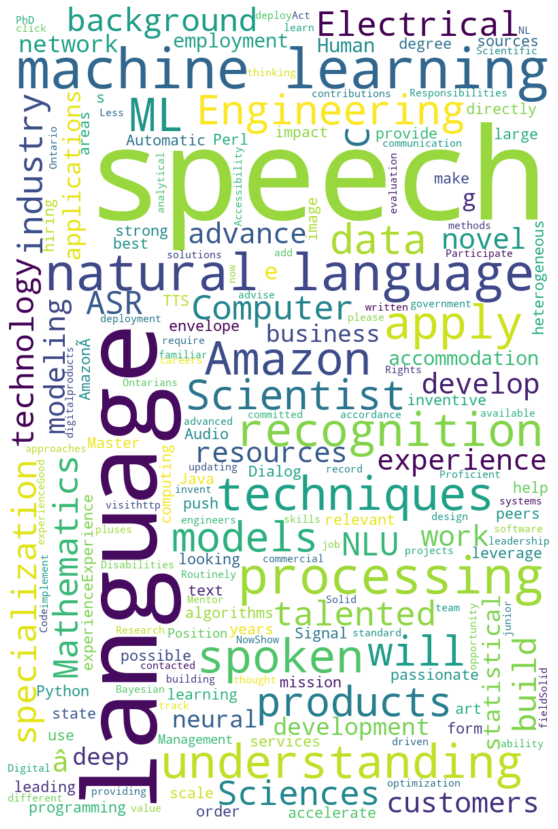

In [16]:
from wordcloud import WordCloud, STOPWORDS

stop_words = ["https", "co", "RT"] + list(STOPWORDS)

wc = WordCloud( ## declare a Wordcloud
    background_color = 'white',
    stopwords = stop_words, ## words that we want to ignore
    height = 1200,
    width = 800
)

wc.generate(job_desc)

plt.figure(figsize=(25,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# wc.to_file('wordcloud_output.png') ## outputs wordcloud as .png file